In [85]:
%pylab inline
from matplotlib import pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [86]:
def line_func(x, a=-1.33, b=224):
    return a*x + b 

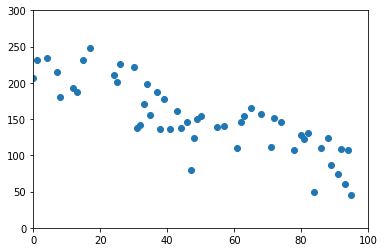

In [87]:
points_xs = np.unique(np.sort(np.random.randint(0,100, 60)))
points_ys = line_func(points_xs) + np.random.randn(points_xs.shape[0]) * 30
plt.xlim(0,100)
plt.ylim(0,300)
plt.scatter(points_xs, points_ys);

In [88]:
points = np.stack((points_xs, points_ys),1)

In [89]:
def hypothesis(points,a,b):
    return a * points[:,0] + b

def cost(points,a,b):
    return 0.5 * np.sum((hypothesis(points,a,b) - points[:,1])**2) / len(points)

def deriv_cost_a(points, a, b):
    return np.sum((hypothesis(points,a,b) - points[:,1]) * points[:,0]) / len(points)

def deriv_cost_b(points, a, b):
    return np.sum((hypothesis(points,a,b) - points[:,1])) / len(points)

In [90]:
learning_rate = 0.0005
a, b = np.random.rand(2)
for i in range(40000):
    da = deriv_cost_a(points,a,b)
    db = deriv_cost_b(points,a,b)
    a = a - learning_rate * da
    b = b - learning_rate * db
print(a,b,cost(points,a,b))

-1.41313156123 221.632074008 352.006169061


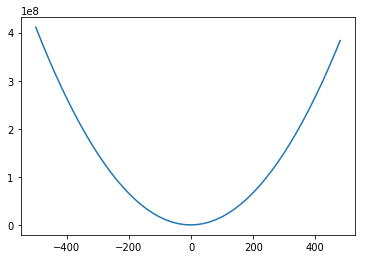

In [91]:
da_xs = np.arange(-500,500,20)
da_ys = [cost(points,a=x,b=b) for x in da_xs]
plt.plot(da_xs, da_ys);

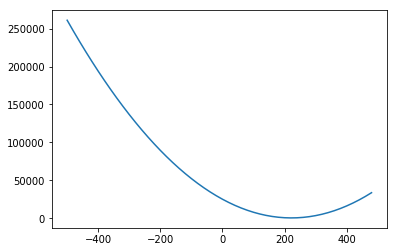

In [92]:
db_xs = np.arange(-500,500,20)
db_ys = [cost(points,a=a,b=x) for x in db_xs]
plt.plot(db_xs, db_ys);

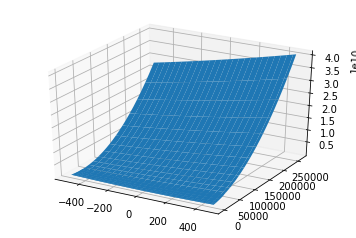

In [93]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(da_xs, db_ys)
zs = np.array([cost(points,x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X,Y,Z,rstride=2,cstride=2,shade=False);

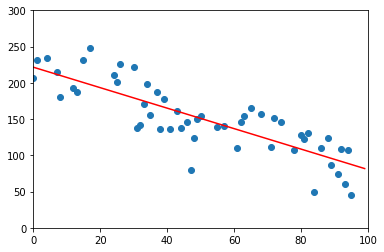

In [94]:
line_xs = np.arange(0,100)
line_ys = line_func(line_xs,a,b)
plt.xlim(0,100)
plt.ylim(0,300)
plt.plot(line_xs,line_ys,c='red');
plt.scatter(points_xs, points_ys);